<a href="https://colab.research.google.com/github/arthurcbaia/Opmitized-stock-portifolio/blob/main/Carteira_de_investimentos_Perfeita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Carteira de investimentos Arthur Cemin Baia 213259



In [18]:
import pandas as pd
from pandas.util.testing import assert_frame_equal
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import scipy.optimize
import seaborn 

In [3]:
bbdc4 = 'BBDC4.SA'
itub4 = 'ITUB4.SA'
vale3 = 'VALE3.SA'
petr4 = 'PETR4.SA'
Mglu = 'MGLU3.SA'

In [4]:
bbdc = data.DataReader(bbdc4, start='2018-8-05', end='2020-8-05', data_source='yahoo')['Adj Close']
itau = data.DataReader(itub4, start='2018-8-05', end='2020-8-05', data_source='yahoo')['Adj Close']
vale = data.DataReader(vale3, start='2018-8-05', end='2020-8-05', data_source='yahoo')['Adj Close']
petro = data.DataReader(petr4, start='2018-8-05', end='2020-8-05', data_source='yahoo')['Adj Close']
maga = data.DataReader(Mglu, start='2018-8-05', end='2020-8-05', data_source='yahoo')['Adj Close']


#Gráfico de preços

<Figure size 432x288 with 0 Axes>

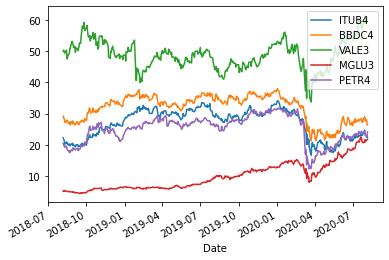

In [9]:
precos = pd.concat([bbdc,itau,vale,maga,petro],axis=1)
precos.columns = ['ITUB4','BBDC4','VALE3','MGLU3','PETR4']
fig = plt.figure()
(precos + 1).plot()
plt.show()

#Retornos

O retorno logaritmico pode ser calculado a partir da seguinte relação matemática:
$Retorno = log(Precofinal/Precoinicial)$

Retorno Bradesco
Retorno médio: 6.757798973491365e-06


Text(0.5, 0, 'Período entre 2018-05-08 a 2020-05-08')

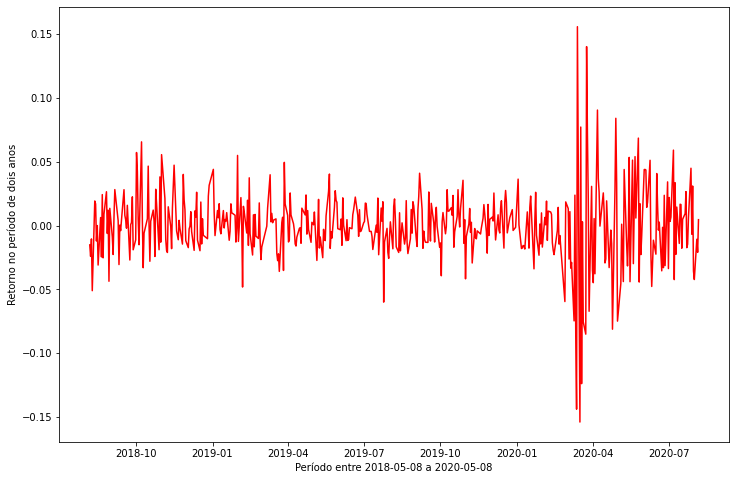

In [10]:
print("Retorno Bradesco")
retbrad = np.log(bbdc/bbdc.shift(1))
print("Retorno médio:",retbrad.mean())
plt.figure(figsize=(12,8))
plt.plot(retbrad,c = 'r')

plt.ylabel("Retorno no período de dois anos")
plt.xlabel("Período entre 2018-05-08 a 2020-05-08")

Retorno Itau
Retorno médio: -0.00020810889774728678


Text(0.5, 0, 'Período entre 2018-05-08 a 2020-05-08')

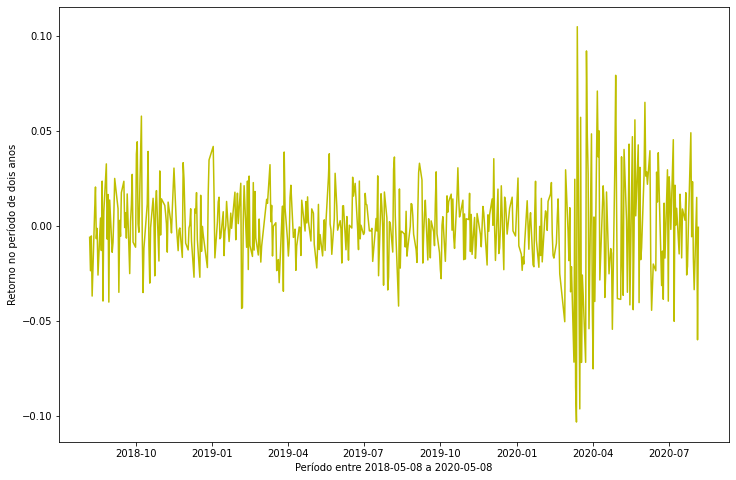

In [11]:
print("Retorno Itau")
plt.figure(figsize=(12,8))
reti = np.log(itau/itau.shift(1))
print("Retorno médio:",reti.mean())
plt.plot(reti,c='y')
plt.ylabel("Retorno no período de dois anos")
plt.xlabel("Período entre 2018-05-08 a 2020-05-08")

Retorno VALE3
Retorno médio: 0.00040130262686116506


Text(0.5, 0, 'Período entre 2018-05-08 a 2020-05-08')

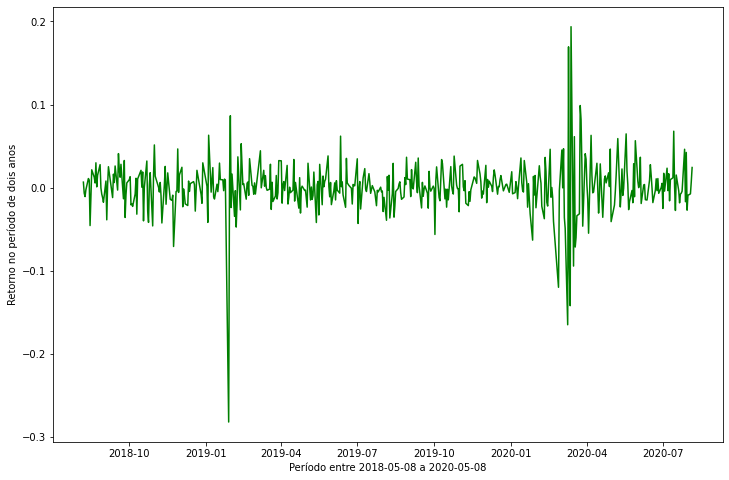

In [12]:
print("Retorno VALE3")
plt.figure(figsize=(12,8))
retv = np.log(vale/vale.shift(1))
print("Retorno médio:",retv.mean())
plt.plot(retv, c='g')
plt.ylabel("Retorno no período de dois anos")
plt.xlabel("Período entre 2018-05-08 a 2020-05-08")

Retorno PETR4
 
Retorno médio: 0.00034534670942213845
 
 


Text(0.5, 0, 'Período entre 2018-05-08 a 2020-0-08')

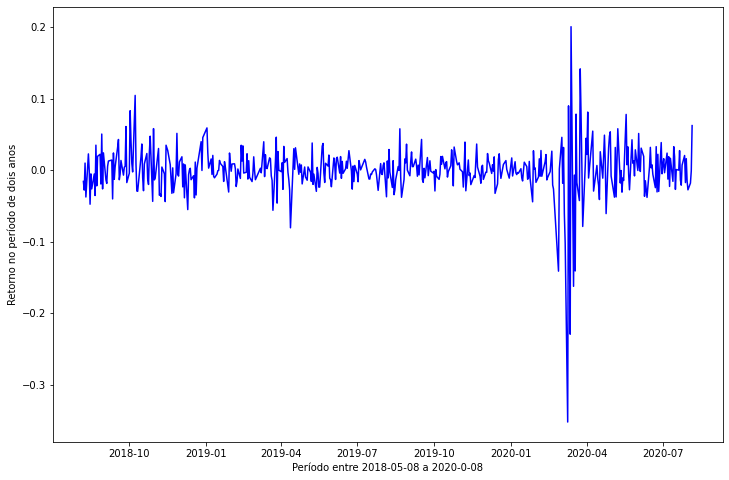

In [13]:
print("Retorno PETR4")
plt.figure(figsize=(12,8))
print(" ")
retp = np.log(petro/petro.shift(1))
print("Retorno médio:",retp.mean())
print(" ")
plt.plot(retp,c='b')
print(" ")
plt.ylabel("Retorno no período de dois anos")
plt.xlabel("Período entre 2018-05-08 a 2020-0-08")

Retorno MGLU3
 
Retorno médio: 0.003256777028629212
 
 


Text(0.5, 0, 'Período entre 2018-05-08 a 2020-05-08')

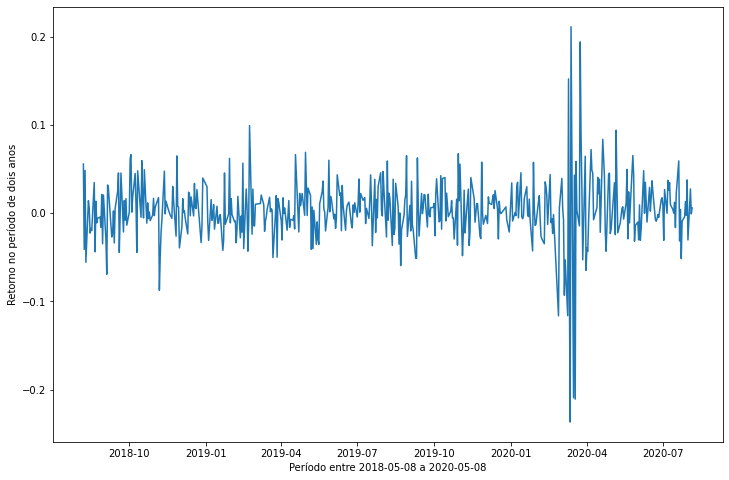

In [14]:
print("Retorno MGLU3")
plt.figure(figsize=(12,8))
print(" ")
retm = np.log(maga/maga.shift(1))
print("Retorno médio:",retm.mean())
print(" ")
plt.plot(retm)
print(" ")
plt.ylabel("Retorno no período de dois anos")
plt.xlabel("Período entre 2018-05-08 a 2020-05-08")

# Retornos em conjunto

<Figure size 864x576 with 0 Axes>

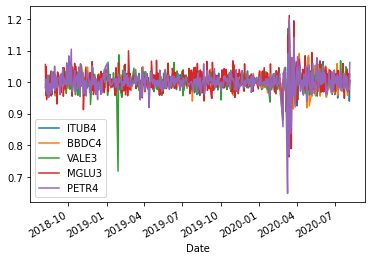

In [15]:
retornos = pd.concat([reti,retbrad,retv,retm,retp],axis=1)
retornos.columns = ['ITUB4','BBDC4','VALE3','MGLU3','PETR4']
fig = plt.figure(figsize=(12,8))
(retornos + 1).plot()
plt.show()



A partir da análise dos retornos individualmente e em conjunto, pode-se dizer que há um comportamento similiar no início de 2020, mais precisamente no primeiro trimestre, no qual as quatro ações apresentaram uma grande volatilidade, que teve correlação com a pandemia global do COVID-19. Além disso, na maior parte do período analisado houve uma volatidade média baixa nas quatro ações.

# Correlações

In [16]:
retcorr = retornos.corr()
retcorr

,ITUB4,BBDC4,VALE3,MGLU3,PETR4
ITUB4,1.000000,0.911241,0.438689,0.511955,0.629318
BBDC4,0.911241,1.000000,0.487304,0.567780,0.687035
VALE3,0.438689,0.487304,1.000000,0.447253,0.593764
MGLU3,0.511955,0.567780,0.447253,1.000000,0.587843
PETR4,0.629318,0.687035,0.593764,0.587843,1.000000


# Mapa de correlações


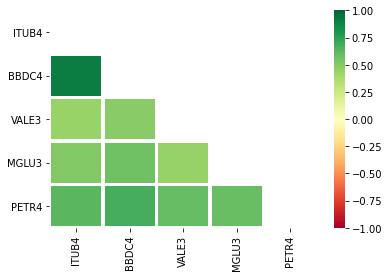

In [19]:
 #take the bottom triangle since it repeats itself
 mask = np.zeros_like(retcorr)
 mask[np.triu_indices_from(mask)] = True
 #generate plot
 seaborn.heatmap(retcorr, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 plt.yticks(rotation=0) 
 plt.xticks(rotation=90) 
 plt.show()

#Carteira perfeita de ações

Segundo a teoria de finanças, uma carteira otimizada esta relacionada numa combinação de ações que maximizem o retorno financeiro e minimize o risco relacionado. A partir disso, é possível criar um algoritmo que gere uma carteira perfeita, a qual é feita a partir da randomização dos pesos( o modelo matematico é uma média ponderada entre quantidade de ações e seus pesos).

#Pesos arbitrários

In [ ]:
pesos = [0.2,0.2,0.2,0.2,0.2]
pesos = pesos/np.sum(pesos)
    
ret1 = []
std1 = []
ret1 = np.sum( (retornos.mean() * pesos * 252))
std1 = np.sqrt(np.dot(pesos.T, np.dot(retornos.cov()*252, pesos)))

print(ret1)
print(std1)

pesos2 = [0.025,0.025,0.025,0.9,0.025]
pesos2 = pesos2/np.sum(pesos2)
    
ret2 = []
std2 = []
ret2 = np.sum( (retornos.mean() * pesos2 * 252))
std2 = np.sqrt(np.dot(pesos2.T, np.dot(retornos.cov()*252, pesos2)))

print(ret2)
print(std2)


pesos3 = [0.04,0.04,0.04,0.44,0.44]
pesos3 = pesos3/np.sum(pesos3)
    
ret3 = []
std3 = []
ret3 = np.sum( (retornos.mean() * pesos3 * 252))
std3 = np.sqrt(np.dot(pesos3.T, np.dot(retornos.cov()*252, pesos3)))

print(ret3)
print(std3)

pesos4 = [0.3,0.3,0.3,0.05,0.05]
pesos4 = pesos4/np.sum(pesos4)
    
ret4 = []
std4 = []
ret4 = np.sum( (retornos.mean() * pesos4 * 252))
std4 = np.sqrt(np.dot(pesos4.T, np.dot(retornos.cov()*252, pesos4)))

print(ret4)
print(std4)








0.12428808697760665
0.41407748590480054
0.7080152899263322
0.5739930561000739
0.34523769082899225
0.5045049077676811
-0.013805415429509346
0.383605203166778


In [ ]:
np.random.seed(42)
num_ports =  50000
all_weights = np.zeros((num_ports, len(precos.columns)))
ret_arr = np.zeros(num_ports)
std_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)



for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (retornos.mean() * weights * 252))
    
    # Expected volatility
    std_arr[x] = np.sqrt(np.dot(weights.T, np.dot(retornos.cov()*252, weights)))
    

     # Sharpe Ratio
    sharpe_arr[x] = (ret_arr[x]-0.0325)/std_arr[x]


print(sharpe_arr.argmax())
print(sharpe_arr.max().argmax())

31115
0


In [ ]:
print(all_weights[0,:])
ret = ret_arr[sharpe_arr.max().argmax()]
vol = std_arr[sharpe_arr.max().argmax()]
print(std_arr.min())
print(ret,vol,ret/vol)

[0.13319703 0.33810082 0.26031769 0.21289984 0.05548463]
0.360445363530841
0.13272717490489017 0.40696655075397536 0.3261377984480304


#Gráfico de possíveis combinações das quatro ações

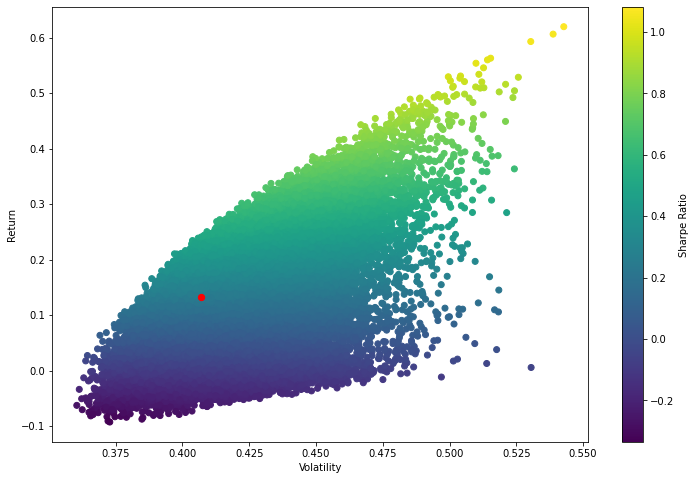

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol, ret,c='red', s=40) # red dot
plt.show()

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(retornos.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(retornos.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])
def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1



In [ ]:
print(get_ret_vol_sr(weights))
print(neg_sharpe(weights))
print(check_sum(weights))


[0.03167756 0.39377476 0.08044588]
-0.08044587618160076
0.0


In [ ]:
cons = ({'type':'eq','fun':check_sum})
bounds=((0,1),(0,1),(0,1),(0,1),(0,1))
chute = [0.2,0.2,0.2,0.2,0.2]

In [ ]:
opt_results = scipy.optimize.minimize(neg_sharpe,chute,method = 'SLSQP',bounds = bounds,constraints = cons)
opt_results

     fun: -1.3039428691577863
     jac: array([ 6.43304273e-01,  6.82383358e-01,  5.20558789e-01, -1.49011612e-08,
        7.51220733e-01])
 message: 'Optimization terminated successfully.'
    nfev: 14
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.66533454e-16, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00])

In [ ]:

get_ret_vol_sr(opt_results.x)

array([0.79140489, 0.60693218, 1.30394287])

In [ ]:

frontier_y = np.linspace(0,0.3,200)

In [ ]:
def minimize_volatility(weights):
  return get_ret_vol_sr(weights)[1]

In [ ]:
vol_min =  minimize_volatility(weights)

In [ ]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = spy.optimize.minimize(minimize_volatility,chute,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

#Fronteira eficiente com cinco possíveis cenários

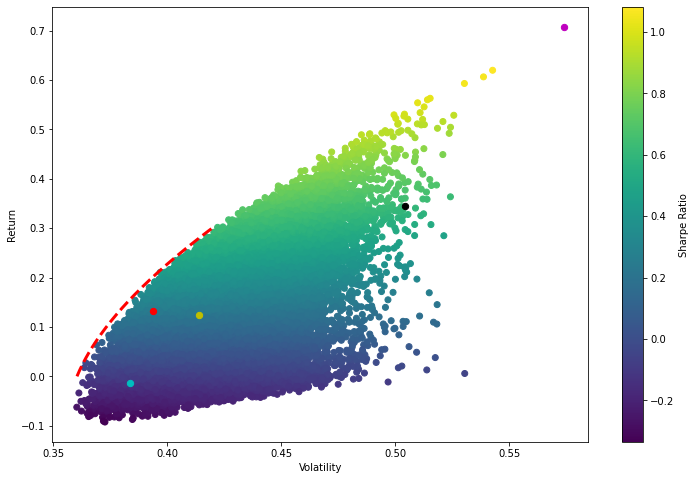

In [ ]:

plt.figure(figsize=(12,8))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.scatter(vol_min,ret,c='red', s=40)
plt.scatter(std1,ret1,c='y', s=40)
plt.scatter(std2,ret2,c='m', s=40)
plt.scatter(std3,ret3,c='k', s=40)
plt.scatter(std4,ret4,c='c', s=40)
plt.show()


In [ ]:
print(vol_min)
print(ret)
print(weights)


0.3937747632159312
0.13272717490489017
[0.47096913 0.00625811 0.16381547 0.10829171 0.25066557]


# A carteira eficiente tem 13% de retorno e 39 % de volatidade, usando 47% de'ITUB4', 0,6% de 'BBDC4', 16% de 'VALE3', 10 % de'MGLU3', e 25% de 'PETR4'.